In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as scf

#CREATION D'UN SIGNAL A 2 FREQUENCES AVEC BRUIT.

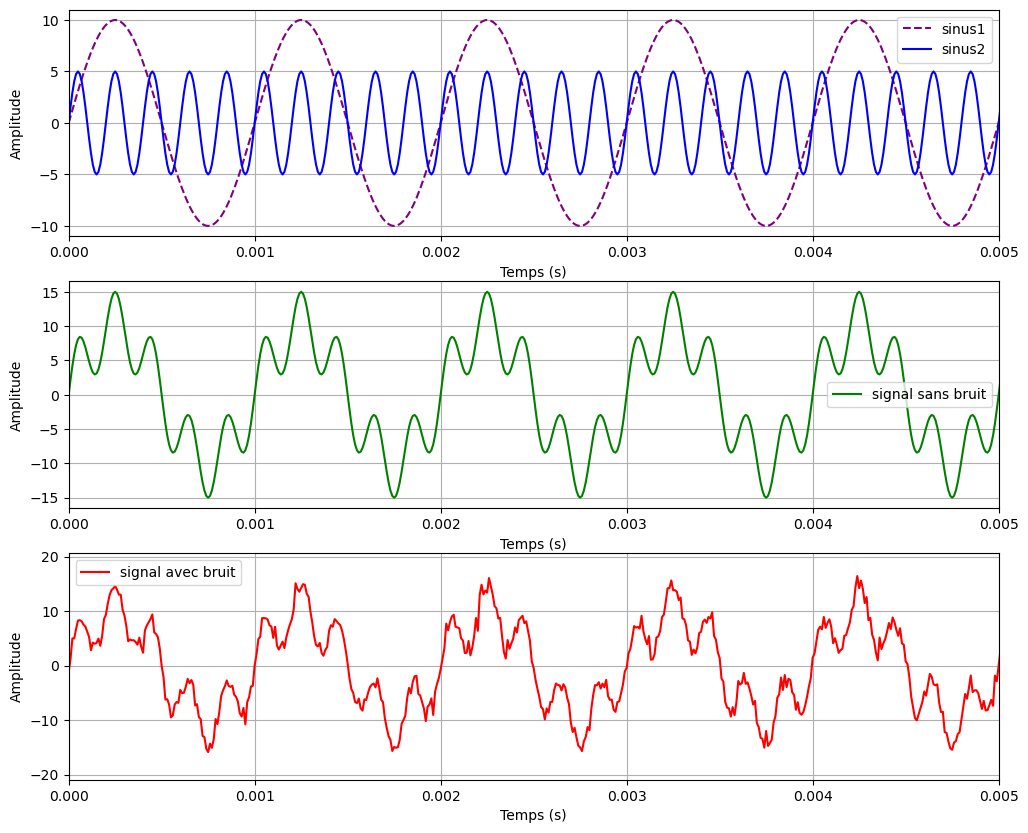

In [44]:
duration = 5
t = np.arange(0,duration, 1e-5)
A1, A2 = 10, 5
freq1, freq2 = 1000, 5000
sin1 = A1 * np.sin(2 * np.pi * freq1 * t)
sin2 = A2 * np.sin(2 * np.pi * freq2 * t)

s_clean = sin1 + sin2
#ajout de valeurs aléatoires au signal propre
s_noise = s_clean + np.random.randn(len(s_clean))

#visualisation des signaux.
plt.figure(figsize=(12, 10))
plt.subplot(3,1,1)
plt.plot(t, sin1, linestyle="--", color="purple", label='sinus1')
plt.plot(t, sin2, color="blue", label='sinus2')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([0,0.005])


plt.subplot(3,1,2)
plt.plot(t, s_clean, color="green", label='signal sans bruit')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([0,0.005])

plt.subplot(3,1,3)
plt.plot(t, s_noise, color="red", label='signal avec bruit')
plt.xlabel("Temps (s)")
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([0,0.005])
plt.show()

#Creation du ficher audio du signal avec bruit.


In [46]:
from scipy.io.wavfile import write
#encodage sur 16 bits du signal
normalized_s = np.int16(s_noise/s_noise.max()*32767)

write('signal_bruité.wav', int(len(t)/duration), normalized_s)

# élimination du bruit pour obtenir un signal propre.

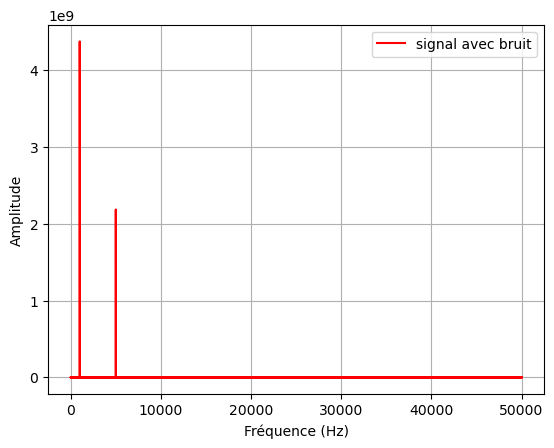

In [48]:
sampling_rate = int(len(t)/duration)
N = sampling_rate * duration
# transformée de fourier pour passer du domaine temporel au domaine fréquentiel
xf = scf.rfftfreq(N, 1/sampling_rate)
yf = scf.rfft(normalized_s)
plt.figure()
plt.plot(xf, np.abs(yf), color="red", label='signal avec bruit')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

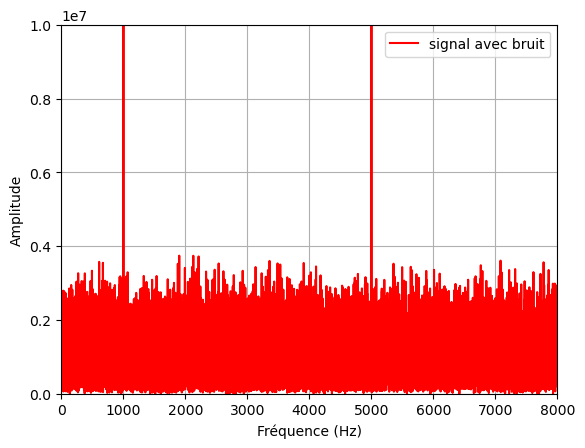

In [49]:
#reduction de l'echelle fréquence et des emplitudes pour mieux abserver les fréquences des bruits
plt.figure()
plt.plot(xf, np.abs(yf), color="red", label='signal avec bruit')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([0, 8000])
plt.ylim([0,1e7])
plt.show()

In [50]:
###Filtrage numérique

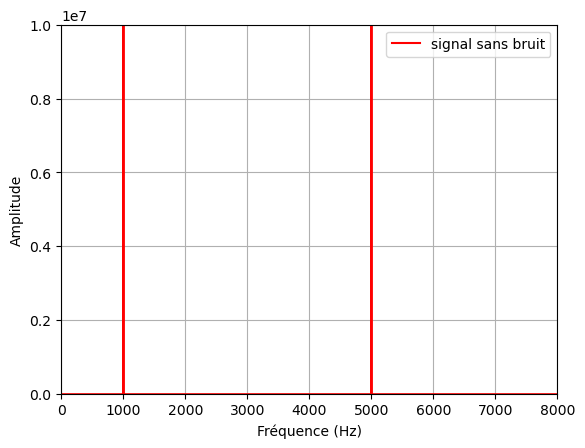

In [51]:
#récupération des indices des fréquences des bruits 
index= np.where((xf < freq1-1) | ((xf > freq1+1) & (xf < freq2-1)) | (xf> freq2+1))
yf[index] = 0

plt.figure()
plt.plot(xf, np.abs(yf), color="red", label='signal sans bruit')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([0, 8000])
plt.ylim([0,1e7])
plt.show()

In [52]:
## reconversion du signal du domaine frequentiel au domaine temporel

(0.0, 0.005)

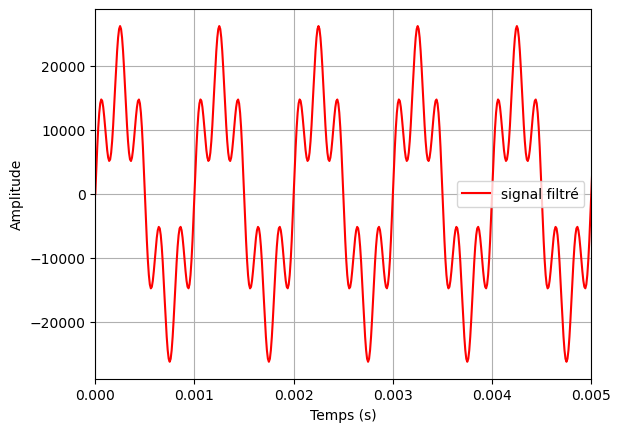

In [53]:
filtered_s= scf.irfft(yf)
plt.figure()
plt.plot(t, filtered_s, color="red", label='signal filtré')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([0,0.005])

In [54]:
#encodage sur 16 bits du signal
normalized_s = np.int16(filtered_s/filtered_s.max()*32767)

write('signal_filtré.wav', int(len(t)/duration), normalized_s)